In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns

In [ ]:
stocks = pd.read_csv('adjprice.csv') # read the Diabetes dataset in to a pandas dataframe
stocks

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,19930907,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,19930908,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,19930909,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,19930910,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,19930911,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,20190727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,20190728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,20190729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,20190730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [ ]:
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y%m%d')
stocks

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stocks.columns = stocks.columns.str.replace(' US Equity', '')
stocks

,Date,0111145D,0202445Q,0203524D,0226226D,0376152D,0440296D,0544749D,0574018D,0598884D,...,YNR,YRCW,YUM,YUMC,ZBH,ZETHQ,ZION,ZRN,ZTS,ZTS-W
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [ ]:
StartDate = "2017/01/01"
EndDate = "2017/12/31"

In [ ]:
stocks_short = stocks[(stocks["Date"] >= StartDate) & (stocks["Date"] <= EndDate)]
stocks_short.dropna(axis=1,inplace=True)
stocks_short

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,...,XOM,XRAY,XRX,XYL,YRCW,YUM,YUMC,ZBH,ZION,ZTS
8517,2017-01-01,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
8518,2017-01-02,44.8490,28.08,45.8477,168.541,112.3010,58.1480,75.5216,112.68,36.8635,...,83.4901,57.0649,21.6324,48.3152,13.28,61.4355,25.8581,101.7467,41.7802,52.8318
8519,2017-01-03,45.7644,28.83,45.4647,170.016,112.6210,57.9530,79.7908,112.36,37.4777,...,84.0728,57.9447,25.9213,48.4421,13.54,61.3191,25.9769,101.8748,41.9161,52.8910
8520,2017-01-04,46.3649,30.26,45.8575,171.411,112.4949,58.7701,81.7708,115.74,37.7752,...,83.1478,58.4191,26.8994,49.1641,14.14,61.5422,26.3530,102.8115,42.5179,53.4042
8521,2017-01-05,45.8137,30.65,45.0621,171.291,113.0670,59.2158,80.8243,114.81,38.1016,...,81.9083,57.6580,26.7866,48.7153,13.85,61.7459,26.7193,103.4720,41.8287,53.2266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2017-12-27,66.6991,51.84,51.8983,99.640,168.0766,94.4085,91.0247,190.42,56.4357,...,80.5614,65.5450,28.4178,67.4304,14.71,81.3177,39.8837,119.1535,49.7199,72.0207
8878,2017-12-28,66.8478,54.14,51.9578,99.580,168.5495,94.1198,91.0149,190.55,56.4259,...,80.6766,66.0296,28.6317,67.4502,14.54,81.5841,40.3700,120.9920,50.3376,71.9611
8879,2017-12-29,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131
8880,2017-12-30,66.5190,53.87,51.5319,99.560,166.7269,93.0803,90.2580,187.41,56.0429,...,80.3117,65.4332,28.3401,67.4008,14.38,80.5380,39.7150,119.9187,49.8376,71.6131


In [ ]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that

stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1

# calcuate standard variation of time series and divide by first price
stocks_var = stocks_short.iloc[:,1:].std()/stocks_short.iloc[0,1:]
sharpe_ratio = stocks_return/stocks_var

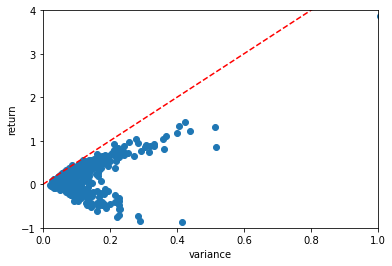

In [ ]:
plt.scatter(stocks_var,stocks_return)
plt.plot([0,1],[0,5],ls='--', color = "red") # reference line of return = 5*std
plt.xlabel('variance')
plt.ylabel('return')
plt.xlim([.0,1])
plt.ylim([-1,4]);

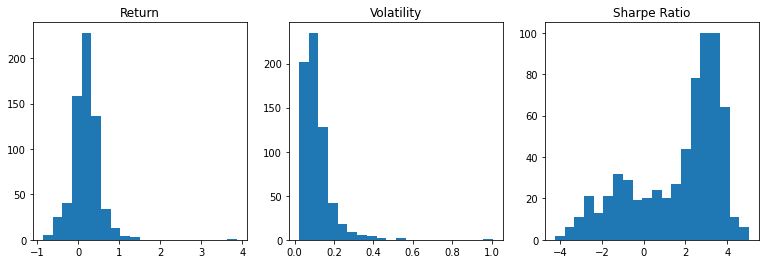

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_var,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio');

In [ ]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head(20)

LM       5.038678
LOW      4.863452
TIF      4.843593
CLX      4.680904
CSX      4.671439
EMR      4.671248
ILMN     4.344673
AA       4.313605
ARNC     4.277256
HD       4.267495
TKR      4.262052
NSC      4.233976
RSG      4.195317
LEN      4.193245
PH       4.160009
NWS       4.12101
MAS      4.116292
LEN/B    4.096175
UNP      4.094454
DRI       4.02907
dtype: object

Create a random portfolio of NSTOCKS stocks, which all have positive return for the period of interest.

In [ ]:
NSTOCKS = 20
# drop all the stocks with negative return and take a random sample of the remainder
stocks_return = stocks_return[stocks_return > 0].sample(n=NSTOCKS)

Copy the stock timeseries for each stock in the portfolio into a new dataframe.

In [ ]:
 # create a new dataframe with the first column being the dates
portfolio = pd.DataFrame(stocks_short['Date'],columns=['Date'])
for col in stocks_short.columns: # go through all the columns in our original data frame
    if col in stocks_return.index: # check if this column is in the names for our random sample
        portfolio = pd.concat([portfolio,stocks_short[col]],axis=1) # if so, add the stock prices to the new dataframe

portfolio

,Date,AJG,ARE,ATVI,BBT,BIIB,BLK,BR,CAL,CCL,...,GWW,JPM,KBH,ORCL,PEG,PH,PYPL,VRSN,WELL,WYND
8517,2017-01-01,49.7206,105.5665,35.7062,44.4162,261.206,365.354,64.4689,32.3157,49.2186,...,222.376,82.4754,15.6730,37.2443,41.1659,135.4078,39.47,76.07,60.0625,32.8322
8518,2017-01-02,49.7206,105.5665,35.7062,44.4162,261.206,365.354,64.4689,32.3157,49.2186,...,222.376,82.4754,15.6730,37.2443,41.1659,135.4078,39.47,76.07,60.0625,32.8322
8519,2017-01-03,49.9886,105.0441,36.2303,44.3784,268.694,371.009,64.1091,32.1089,49.2943,...,224.482,83.3739,16.0893,37.4874,40.7062,137.8742,40.25,77.31,59.3805,32.6516
8520,2017-01-04,50.6201,107.7039,36.9422,44.7185,270.850,371.230,64.5370,32.9459,49.9372,...,226.283,83.5277,16.8130,37.6721,40.9876,137.9612,41.00,78.96,59.8381,32.8021
8521,2017-01-05,50.7350,107.3144,37.5157,44.1423,270.408,367.275,64.2064,31.4985,50.7786,...,222.386,82.7588,16.9320,37.5749,41.0533,136.7329,41.06,79.80,61.1753,32.8752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,2017-12-27,62.1120,127.4291,63.0151,48.5146,320.070,505.516,89.9208,33.1644,64.7385,...,232.776,104.8186,31.6939,46.6302,49.6522,195.5664,74.59,114.38,59.7226,50.8172
8878,2017-12-28,62.5148,127.7615,63.0748,48.6505,320.330,509.113,89.9703,33.3433,64.4670,...,233.719,105.3758,32.1222,46.7680,49.9734,195.8613,74.17,115.50,60.1473,51.3854
8879,2017-12-29,62.1709,127.6833,62.9952,48.2623,318.570,504.916,89.6733,33.2737,64.3603,...,232.040,104.5448,31.8234,46.5318,50.1292,196.2251,73.62,114.44,60.1945,51.0374
8880,2017-12-30,62.1709,127.6833,62.9952,48.2623,318.570,504.916,89.6733,33.2737,64.3603,...,232.040,104.5448,31.8234,46.5318,50.1292,196.2251,73.62,114.44,60.1945,51.0374


Calculate and plot the correlation of the returns in the portfolio. This is important as we need a diversified portfolio, so the stocks in the portfolio should have weak correlation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


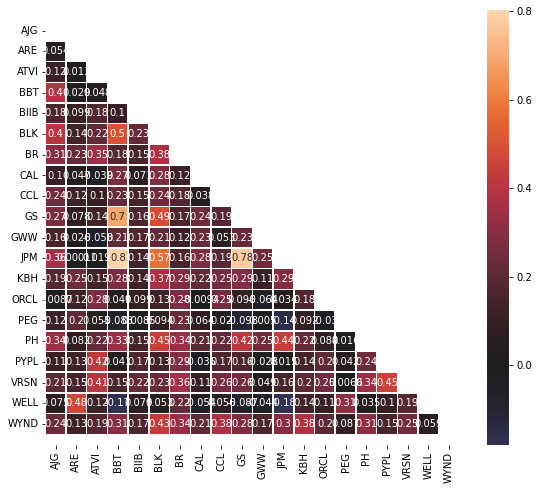

In [ ]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = portfolio.diff(axis=0, periods=1).corr()
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

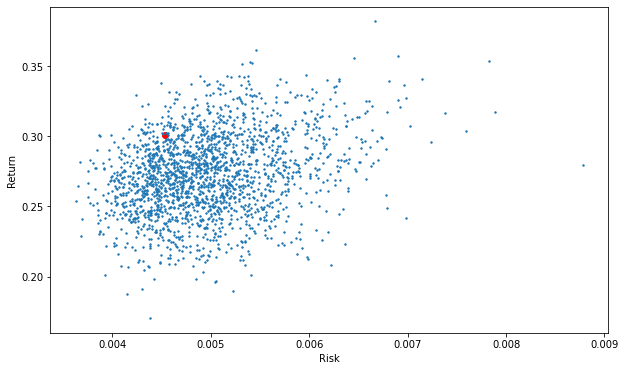

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:] # store the final stock prices
max_returnrisk = 0
for i in range(NSAMP): # loop over all the samples
    weight = np.random.rand(NSTOCKS)# generates weights in the range [0,1] for all the stocks
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = weight.T @ Ro
    w = weight/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
    if (Pf-1)/risk >= max_returnrisk:
        max_returnrisk = (Pf-1)/risk
        weights = weight / weight.sum()
        risk = risk
        max_return = Pf-1
# plot risk vs returns and add axis labels
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(risk,max_return,color='r')
plt.scatter(result_array[0,:],result_array[1,:], s=2)
plt.xlabel('Risk')
plt.ylabel('Return');

In [ ]:
weights = pd.DataFrame(weights*100)

returns = ((R-Ro)/Ro).to_frame()
returns = returns.reset_index()

stock_weights = pd.merge(returns, weights, left_index=True, right_index=True)
stock_weights = stock_weights.set_index(['index'])
stock_weights.columns = ['return (%)', 'weight (%)']
stock_weights = stock_weights['weight (%)']
stock_weights = pd.DataFrame(stock_weights)

In [ ]:
stock_weights

,weight (%)
index,
AJG,4.584576
ARE,5.014352
ATVI,3.221250
BBT,3.783181
BIIB,10.364929
BLK,12.673606
BR,3.122115
CAL,3.358059
CCL,2.229319


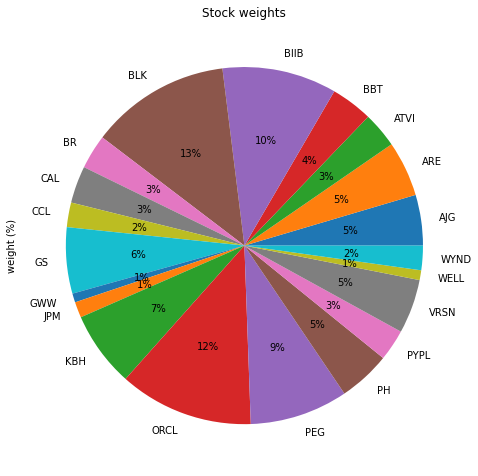

In [ ]:
plt.rcParams["figure.figsize"] = (8,20)

stock_weights['weight (%)'].plot(kind='pie', autopct='%1.0f%%',
                                title='Stock weights');